<a href="https://colab.research.google.com/github/rashmidubey2410/Deep-Learning-Hands-on/blob/master/Kaggle_CIFAR_10_Object_Recognition_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle- CIFAR-10 - Object Recognition in Images**
### Identify the subject of 60,000 labeled images (2D CNN in TensorFlow 2.0)


In [5]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout

In [6]:
print(tf.__version__)

2.2.0


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.datasets import  cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


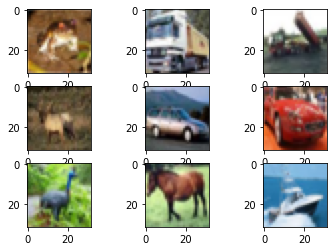

In [48]:
# plot first few images

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

In [10]:
classes_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
x_train.max()

255

In [12]:
# normalize to range 0-1
x_train= x_train /255
x_test= x_test/ 255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## **Build CNN Model**

In [17]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D( pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [19]:
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [20]:
hist=model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 28s 6ms/step - loss: 1.3805 - sparse_categorical_accuracy: 0.5044 - val_loss: 1.0941 - val_sparse_categorical_accuracy: 0.6108
Epoch 2/10
5000/5000 [==============================] - 27s 5ms/step - loss: 1.0719 - sparse_categorical_accuracy: 0.6216 - val_loss: 1.0144 - val_sparse_categorical_accuracy: 0.6374
Epoch 3/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.9609 - sparse_categorical_accuracy: 0.6623 - val_loss: 0.9553 - val_sparse_categorical_accuracy: 0.6694
Epoch 4/10
5000/5000 [==============================] - 28s 6ms/step - loss: 0.8786 - sparse_categorical_accuracy: 0.6873 - val_loss: 0.9294 - val_sparse_categorical_accuracy: 0.6738
Epoch 5/10
5000/5000 [==============================] - 28s 6ms/step - loss: 0.8161 - sparse_categorical_accuracy: 0.7118 - val_loss: 0.9461 - val_sparse_categorical_accuracy: 0.6735
Epoch 6/10
5000/5000 [==============================] - 28s 6ms/step - loss: 0.7662 -

##  last epoch shows validation accuracy < training accuracy = model overfit 
### between 3rd and 4th epoch model star over fitting 





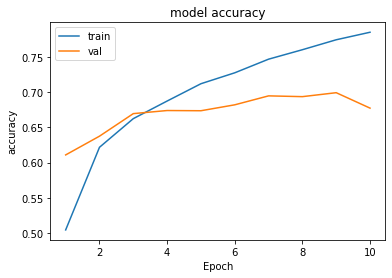

In [24]:
# plot training and validation accuracy
epoch_range= range(1,11)
plt.plot(epoch_range,hist.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,hist.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()



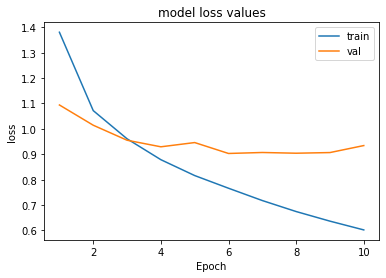

In [26]:
# plot training and validation loss values
epoch_range= range(1,11)
plt.plot(epoch_range,hist.history['loss'])
plt.plot(epoch_range,hist.history['val_loss'])
plt.title('model loss values')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [28]:
y_pred= model.predict_classes(x_test)

In [29]:
y_pred

array([3, 8, 8, ..., 5, 1, 4])

In [30]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [49]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [50]:
mat= confusion_matrix(y_test,y_pred)

In [51]:
mat

array([[640,  16,  58,  39,  34,   3,  14,  14, 108,  74],
       [ 16, 729,  10,  13,   5,   2,   9,   3,  34, 179],
       [ 49,   4, 510,  81, 137,  49,  96,  43,  19,  12],
       [ 12,   6,  58, 513,  98, 129, 107,  49,  14,  14],
       [ 12,   2,  45,  75, 678,  22,  88,  65,   9,   4],
       [  6,   3,  45, 235,  80, 459,  57,  93,  12,  10],
       [  5,   2,  32,  64,  55,  10, 826,   2,   3,   1],
       [ 13,   5,  27,  46,  75,  33,  14, 768,   3,  16],
       [ 51,  34,  11,  16,  13,   4,   7,   5, 811,  48],
       [ 25,  35,   3,  20,   8,   7,   6,  21,  37, 838]])

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f19ec365a90>)

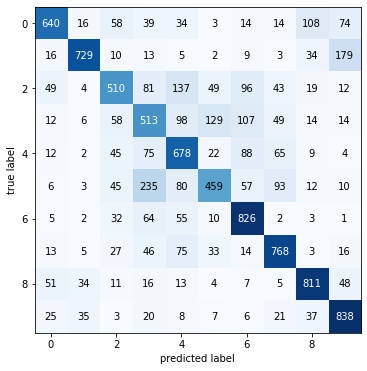

In [52]:
plot_confusion_matrix(mat,figsize=(6,6))